Vamos a conglomerar todos los conceptos vistos en las 3 librerias, la idea es que usemos Online Retail, nuestro dataset seleccionado (revisa directorio de Pandas/herramientas) pero podemos hacerlo con el dataset de nuestra preferencia.
- Considera el objetivo y el contexto de los datos que estas manejando.
Tienes que hacerte varias preguntas, entre ellas:
- ¿Qué es lo que buscan los stackeholeds?
- ¿Que pretendes hallar?
- ¿Cuál es la información importante que podemos resaltar de los datos?

# Exploración de datos
Cargaremos los datos, podemos hacer una visualización normal de los datos, nombre de columnas, número de filas, incluso esto lo podemos hacer con el método info(), en este punto ya debes de tener tus pregutas e identificar de donde vas a sacar la información que nos va ayudar en este contexto.

In [2]:
import pandas as pd

#Cargar dataset
filepath = '/Users/hectorastudillo/py-proyects/data-analysis/projects/basis_platzi_project/Online_Retail.csv'
data = pd.read_csv(filepath, encoding='latin1')

Lo que sigue es explorar nuestros datos...

Podemos usar los siguientes métodos 
- info()
- head()
- describe(), información de estadística básica de las columnas de tipo númericas, veremos cuartiles, desviación estandar, promedio, mediana.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   customerserID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


Ahora podemos ver cuantos datos nos faltan o FILAS DUPLICADAS INCLUSIVE en el set de datos. NO ES NECESARIO QUE USE EL PRINT EN AMBOS, ya viene digamos por defecto que se mostrarán con estos métodos, acceeder a esta información.

Con ello deberiamos de empezar a tomar decisiones para ver que hacer con esos datos, si eliminarlos, rellenarlos, el tratamiento que convenga segun el contexto.

In [4]:
#Quiero la suma total de los datos faltantes
print('Datos NO disponibles por columna:\n', data.isnull().sum())

#Cuantos son los duplicados
print('Filas duplicadas:\n', data.duplicated().sum())

Datos NO disponibles por columna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
customerserID     135080
Country             0
dtype: int64
Filas duplicadas:
 5268


Ahora obtendremos los valores únicos, esto lo haremos ITERANDO en cada una de las columnas.
Por ejemplo en la columna de Country podré obtener cuantos paises podemos observar en este set de datos. 

Lo haremos de forma general pero yo debería de preguntarme de que columnas quiero los datos únicos.

In [5]:
unique_values = {
    col : data[col].unique() for col in data.columns} 
#Vamos a crear un diccionario con comprehension

#Empezamos a visualizar estos valores
for col, values in unique_values.items():
    print(f'Columna: {col}')
    print(f'Número de valores únicos: {len(values)}')
    print(f'Valores únicos: {values[:10]}') #Imprimimos los primeros 10
    print('-'*20) # Separación

Columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------
Columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------
Columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------
Columna: Quantity
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
--------------------
Columna: InvoiceDate
Número de valores únicos: 23260
Valores únicos: ['12/1/10 8:26' '12/1/10 8:28' '12/1/10 8:34' '12

# Limpieza
La etapa 3 corresponde a la limpieza de datos.
- Eliminar filas duplicadas, para ello vamos a crear un NUEVO dataframe, no vamos a modificar directamente en el que exploramos, puede ser útil de guía.

In [6]:
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['customerserID']) 
#ELIMINAR VALORES FALTANTES
# Especificio la columna que se aplicará este método

#Quiero la suma total de los datos faltantes
print('Datos NO disponibles por columna:\n', data_cleaned.isnull().sum())

#Cuantos son los duplicados
print('Filas duplicadas:\n', data_cleaned.duplicated().sum())

Datos NO disponibles por columna:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
customerserID     0
Country        0
dtype: int64
Filas duplicadas:
 0


Luego de la limpieza sigue estar 100% en el rol de científico de datos, piensa según las columnas que tenemos en el set de datos actualmente "limpio" cuales son las nuevas columnas que podemos obtener, crear o incluso transformar su tipo de dato.

# Completar columnas 
Por ejemplo, podemos crear la columna que multiplica la columna cantidad con la de precio unitario...

Podemos convertir de nuevo el tipo de dato de InvoirceDate de objet a date

In [7]:
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate']) #Podemos comprobar con el método info()

/var/folders/kz/rybrs64563zc2gl94rf00qbw0000gn/T/ipykernel_4486/1299663578.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate']) #Podemos comprobar con el método info()


Como esta columna de InvoiceDate ya está en una serie de tiempo puedo desglozarla y crear nuevas columnas, recuerda las buenas prácticas de SQL, normalización, datos atómicos 

In [8]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year

data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

# Hallar insights o información que nos puede proprocionar
Aquí es donde realizamos sumas totales u operadores tanto estadísticos o cualquier otra herrmaienta operacional.
Analizar las ventas por año, semestre, trimestre, etc.

Recordatorio de manipulación de código:
- Indica la columna en la que se establecerán o CREARÁ la información, en este caso agrupará con base a ellas 
- Indica la columna con la que TRABAJRÁ, osea que va a manipular
- Operación a aplicar a la columna con la que se trabaja.

In [9]:
# YA TENEMOS EN ESTE PUNTO CREADA LA COLUMNA YEAR DE DONDE TOMARÁ VALORES UÚNICOS EL NUEVO DATASET 
#TRABAJAREMOS con el conjunto de datos de TotalAmount creado

sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
# Agruparmos por años
# Donde queremos almacenar o guardar esa información
print('Year amounts:\n', sales_by_year)

# SEMESTRAL
#Creamos nuestra columna que utilizaremos para tomar valores únicos, como no la tenemos creada aún, usaremos/APLICAREMOS una lambda function...

data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x : 1 if x <= 6 else 2)
# 1 para el primer semestre
# 2 para el segundo semestre

#Creamos DataFrame, en este caso como solo tenemos 2 años podemos establecer que agrupe por valores únicos de año y semestre
# TRABAJARÁ con TotalAmount y aplicamos la operación
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
print('Información por semestre:\n', sales_by_semester)

#Creamos nuevos dataframes a partir de la información que ya teníamos

Year amounts:
 Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64
Información por semestre:
 Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64


# Visualización 
Uso de Mstplotlib
Contaremos el número total de transacciones que ahn tenido devolución. Los valores negativos indican devoluciones...
Podemos preguntar el tamaño de un dataframe con shape

In [22]:
# Ambas sintaxis son válidas. PERO MUESTRA INFORMACIÓN DE DISTINTA MANERA, LA SEGUNDA OPCIÓN ES LA MEJOR 
print('Devoluciones')
total_return = data_cleaned['Quantity'] < 0

#Mejor opción
total_return = data_cleaned[data_cleaned['Quantity'] < 0]
total_return

#Preguntamos por el tamaño del dataframe
total_return = data_cleaned[data_cleaned['Quantity'] < 0].shape[0] # Para obtener el total de devoluciones, en int y no strings.
total_return

print('No devoluciones')
# Para obtener aquellos que no tuvieron devoluciones hacemos:
total_non_return = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0] # Para obtener el total de devoluciones, en int y no strings.
total_non_return

Devoluciones
No devoluciones


392732

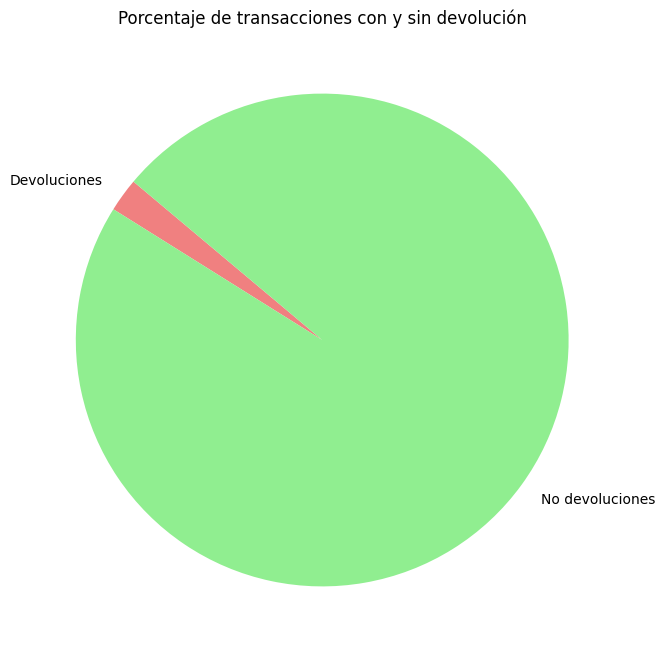

In [24]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No devoluciones']
sizes = [total_return, total_non_return]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors = colors, startangle=140)

plt.title('Porcentaje de transacciones con y sin devolución')
plt.show()

# Otra sintaxis para la creación de gráficos
Distribución de ventas por mes y año.

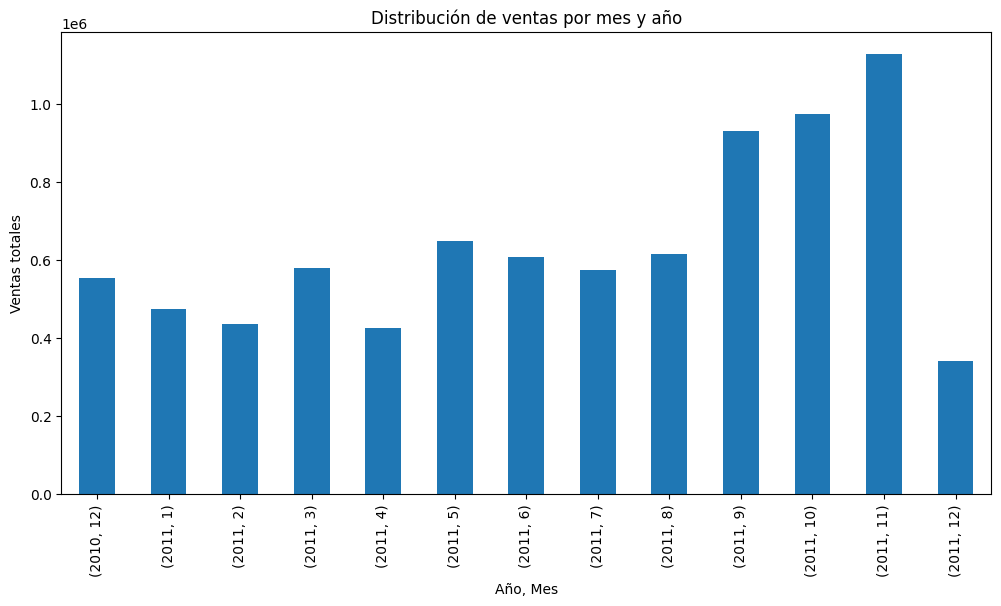

In [25]:
plt.figure(figsize=(12,6))
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(type='bar')

plt.title('Distribución de ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas totales')
plt.show()

Productos TOP 10 más vendidos

In [27]:
top_productos = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

#Descripción de productos 
top_productos = top_productos.reset_index() #Indices limpioa para poder pasar a la graficación

top_productos = pd.merge(top_productos, data_cleaned[['StockCode', 'Description']].drop_duplicates(), 
    on='StockCode', how='left')

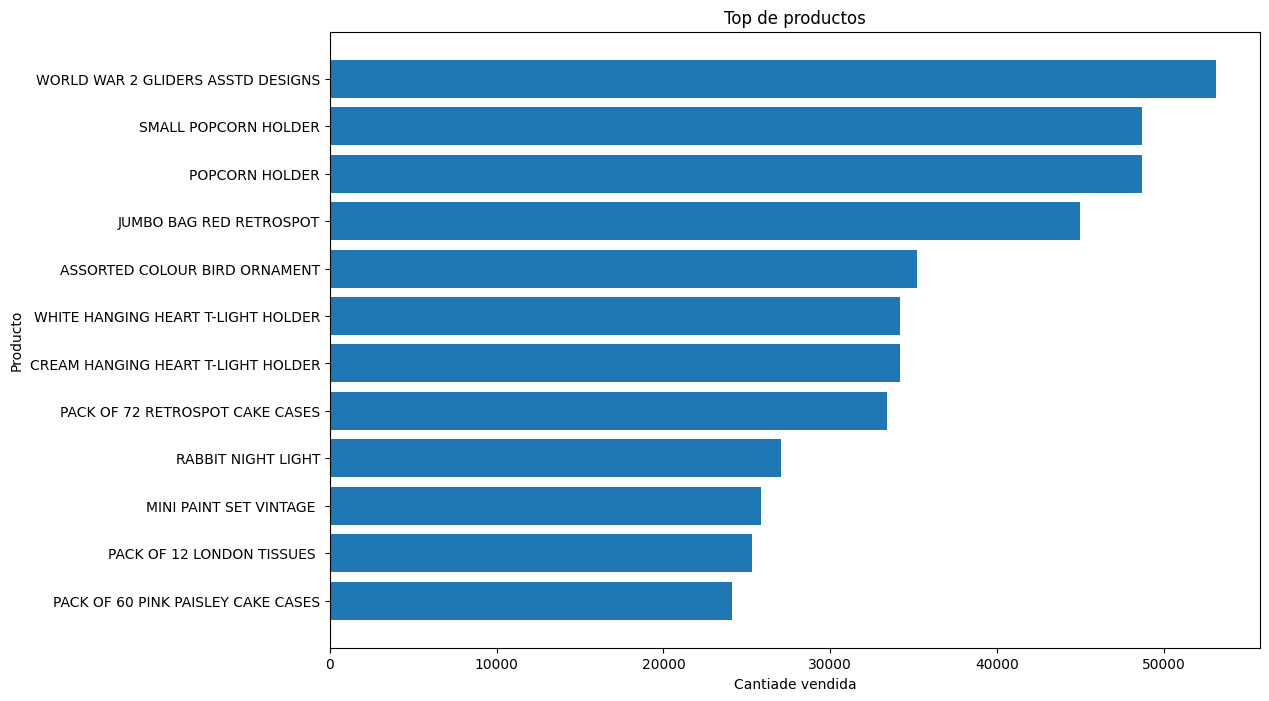

In [28]:
# GRPAFICO

plt.figure(figsize=(12,8))
plt.barh(top_productos['Description'], top_productos['Quantity'])
plt.title('Top de productos')
plt.xlabel('Cantiade vendida')
plt.ylabel('Producto')

plt.gca().invert_yaxis()
plt.show()